In [22]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from numpy import linalg as LA
import scipy.integrate as integrate
import warnings
warnings.filterwarnings('ignore')

# **Question 1**

In [3]:
# function returns value of closed form solution u(t) = 2*exp(t^2)

def func(x):
    return 2*np.exp(x**2)

In [4]:
# function returns du/dt = 2ut

def grad(x,y):
    return 2*x*y

In [5]:
startval = 0
endval = 2
u0 = 2
t0 = 0

Closed form solutions

In [6]:
times_cf = np.linspace(startval, endval, 1000)
u_cf = []
for time in times_cf:
    u_cf.append(func(time))

To plot the closed form solution, we need u(t) for continuous t, so we plot the function u(t) for a range of values between 0 and 2 and integrate it to get the real solutions.

In [9]:
ar_ucrv = integrate.quad(func, 0, 2)
real_auc = round(ar_ucrv[0],3)
real_val_at2 = round(func(2),3)
print('Area under u(t) for 0<t<2 =',real_auc)
print('u(t = 2s) =',real_val_at2)

Area under u(t) for 0<t<2 = 32.905
u(t = 2s) = 109.196


Numerical integration methods

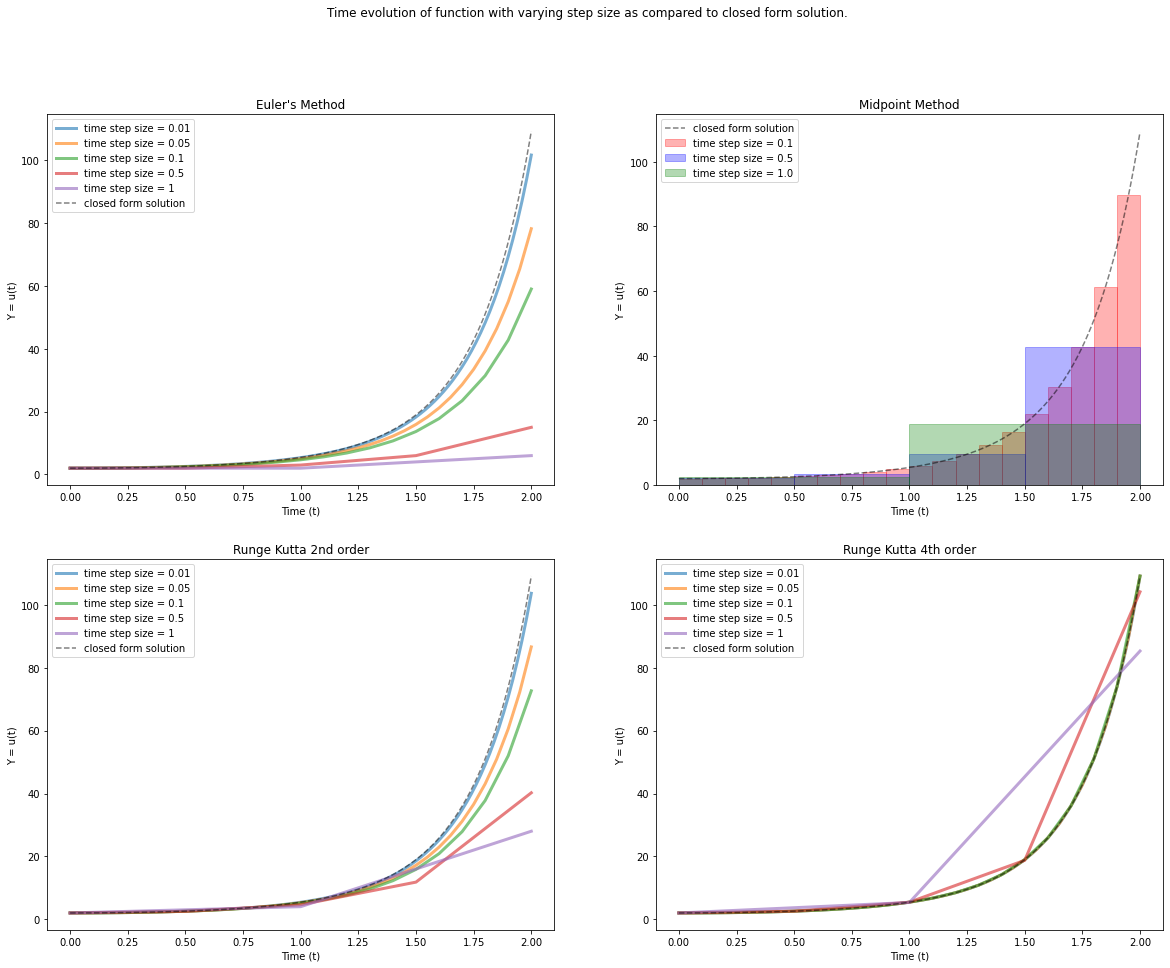

In [7]:
##### EULER
# For Euler's method, we set a range of step values, from small to large, the same step values will be used later on for Runge Kutta 2nd order and 4th order methods.
# For each step size, the algorithm begins at the initial values provided, i.e., t=0s and u=2 and calculates subsequent u(t) by the formula u(ti+1) = u(ti)+step*grad(u(ti)) until t becomes 2 seconds.
# At the end of each run for each step size, the algorithm plots the path traced by the points estimated by the above formula. At the end, the closed form solution is plotted against all others to visualize the diferences.


steps_eu = [0.01, 0.05, 0.1, 0.5, 1]
vals_eu = []
fin_eu = []
plt.figure(figsize = (20, 15))
for h in steps_eu:
    times_eu = []
    times_eu.append(t0)
    u_eu = []
    u_eu.append(u0)
    t = t0
    un = u0
    while t<2.0:
        un_1 = un + (h*grad(t,un))
        t+=h
        u_eu.append(un_1)
        un = un_1
        times_eu.append(t)
        
    times_eu = [round(x,5) for x in times_eu]
    fin_eu.append((h, round(u_eu[len(u_eu)-1],3)))
    vals_eu.append((h, round(integrate.simps(u_eu, dx=h), 3)))
    plt.subplot(2, 2, 1)
    plt.plot(times_eu, u_eu, alpha=0.6, label="time step size = "+str(h), linewidth=3)
    

plt.subplot(2, 2, 1)
plt.plot(times_cf, u_cf, label="closed form solution", linestyle='dashed', color='black', alpha=0.5)
plt.legend()
plt.xlabel("Time (t)")
plt.ylabel("Y = u(t)")
plt.title("Euler's Method")




##### MIDPOINT
# In midpoint method, the number parts are provided that the whole input range has to be divided in. Using the start value and end value, we calculate the step size for each number of partitions considered.
# Next the algorithm iterates over each segment, calculates its midpoint and calculates the value of u(t) at the current midpoint. The segment is represented as a bar of width step size and height, the value of u(t).
# At the end, the area under the function u(t) can be estimated by the sum of the area of the bars at each partition.


parts_mp = [200, 40, 20, 4, 2]
col = ['red', 'blue', 'green']
coli = 0
vals_mp = []

for p in parts_mp:
    times_mp = []
    u_mp = []
    dx = (endval-startval)/p
    a = t0
    I = 0
    while a<2.0:
        temp = (a+(a+dx))/2
        times_mp.append(temp)
        u_mp.append(func(temp))
        a+=dx
    
    ind = len(times_mp)-1
    for uval in u_mp:
        I+=(uval*dx)
    vals_mp.append((dx, round(I,3)))
    if p == 200 or p==40:
        continue
        
    else:
        plt.subplot(2, 2, 2)
        plt.bar(times_mp, u_mp, align='center', width=dx, alpha=0.3, label="time step size = "+str(dx), edgecolor=col[coli], color=col[coli])
        coli+=1


    
plt.subplot(2, 2, 2)    
plt.plot(times_cf, u_cf, label="closed form solution", linestyle='dashed', color='black', alpha=0.5)
plt.legend()
plt.xlabel("Time (t)")
plt.ylabel("Y = u(t)")
plt.title("Midpoint Method")




##### RUNGE KUTTA 2nd ORDER
# Runge Kutta 2nd order and 4th order algorithms work similar to that of Euler's method in that it begins from the initial state and estimates the next point using a gradient based approach.
# The difference is that Runge Kutta takes the weighted average of multiple gradients (2 in the 2nd order and 4 for 4th order) to estimate the next points.
# The Runge Kutta time evolution are plotted against the closed form for multiple step sizes.


vals_rk2 = []
fin_rk2 = []
for h in steps_eu:
    times_rk2 = []
    times_rk2.append(t0)
    u_rk2 = []
    u_rk2.append(u0)
    ti = t0
    ui = u0
    
    while ti<2:
        rk2_k1 = h*grad(ti, ui)
        rk2_k2 = h*grad(ti+h/2, ui+(rk2_k1*h)/2)
        ui_1 = ui + rk2_k2
        ti+=h
        u_rk2.append(ui_1)
        times_rk2.append(ti)
        ui = ui_1
    plt.subplot(2, 2, 3)    
    plt.plot(times_rk2, u_rk2, alpha=0.6, label="time step size = "+str(h), linewidth=3)
    vals_rk2.append((h, round(integrate.simps(u_rk2, dx=h),3)))
    fin_rk2.append((h, round(u_rk2[len(u_rk2)-1],3)))
    


plt.subplot(2, 2, 3)    
plt.plot(times_cf, u_cf, label="closed form solution", linestyle='dashed', color='black', alpha=0.5)
plt.legend()
plt.xlabel("Time (t)")
plt.ylabel("Y = u(t)")
plt.title("Runge Kutta 2nd order")




##### RUNGE KUTTA 4th ORDER
#####
#####
vals_rk4 = []
fin_rk4 = []
for step in steps_eu:
    times_rk4 = []
    times_rk4.append(t0)
    u_rk4 = []
    u_rk4.append(u0)
    ti = t0
    ui = u0
    
    while ti<2:
        rk4_k1 = step*grad(ti, ui)
        rk4_k2 = step*grad(ti+step/2, ui+rk4_k1/2)
        rk4_k3 = step*grad(ti+step/2, ui+rk4_k2/2)
        rk4_k4 = step*grad(ti+step, ui+rk4_k3)
        ui_1 = ui + (1/6)*(rk4_k1+(2*rk4_k2)+(2*rk4_k3)+rk4_k4)
        ti+=step
        u_rk4.append(ui_1)
        times_rk4.append(ti)
        ui = ui_1
    
    plt.subplot(2, 2, 4)            
    plt.plot(times_rk4, u_rk4, alpha=0.6, label="time step size = "+str(step), linewidth=3)
    vals_rk4.append((step, round(integrate.simps(u_rk4, dx=step),3)))
    fin_rk4.append((step, round(u_rk4[len(u_rk4)-1],3)))

    
    
plt.subplot(2, 2, 4)   
plt.plot(times_cf, u_cf, label="closed form solution", linestyle='dashed', color='black', alpha=0.5)
plt.legend()
plt.xlabel("Time (t)")
plt.ylabel("Y = u(t)")
plt.title("Runge Kutta 4th order")



plt.suptitle("Time evolution of function with varying step size as compared to closed form solution.")
plt.show()

Above are the time evolution plots for all the 4 methods using 5 different step sizes which are 0.01s, 0.05s, 0.1s, 0.5s and 1s. For the midpoint method, bars have been plotted only for 3 time steps for visibility but calculation has been done for all 5 time steps. The closed form solution has been superimposed on all to visualize the differences.

In [10]:
# creating a dataframe that shows the errors in area estimation by the different numerical methods
auc_eu = dict(vals_eu)
auc_mp = dict(vals_mp)
auc_rk2 = dict(vals_rk2)
auc_rk4 = dict(vals_rk4)

frames = []
df1 = pd.DataFrame.from_dict(auc_eu, orient='index', columns=['Euler'])
frames.append(df1)
df2 = pd.DataFrame.from_dict(auc_mp, orient='index', columns=['Midpoint'])
frames.append(df2)
df3 = pd.DataFrame.from_dict(auc_rk2, orient='index', columns=['RK 2nd'])
frames.append(df3)
df4 = pd.DataFrame.from_dict(auc_rk4, orient='index', columns=['RK 4th'])
frames.append(df4)

df = frames[0]

for i in range(1, 4):
    df = pd.merge(df, frames[i], left_index=True, right_index=True)
    

df_error = df.transpose().copy()

for i in range(len(df_error)):
    for j in df_error.columns.values:
        df_error[j].iloc[i] = abs(df_error[j].iloc[i] - real_auc)
        
df_error = df_error.add_prefix('h=')
df_error = df_error.add_suffix('s')
df_error

,h=0.01s,h=0.05s,h=0.1s,h=0.5s,h=1.0s
Euler,1.562,6.619,11.093,23.738,27.572
Midpoint,0.002,0.045,0.181,3.934,11.361
RK 2nd,1.048,4.408,7.322,14.789,17.572
RK 4th,0.000,0.000,0.002,0.807,3.317


The above dataframe shows the errors in area estimation by the different numerical methods. A step size of 0.01s shows the best results with least errors. Runge Kutta 4th order method estimates the best low to average step sizes but midpoint method with a low step size performs pretty well in estimating area under the function.

In [11]:
# below code is to create a dataframe to see the errors in estimates of the value of u(t = 2s)
val_eu = dict(fin_eu)
val_rk2 = dict(fin_rk2)
val_rk4 = dict(fin_rk4)

frames2 = []

dfx = pd.DataFrame.from_dict(val_eu, orient='index', columns=['Euler'])
frames2.append(dfx)
dfy = pd.DataFrame.from_dict(val_rk2, orient='index', columns=['RK 2nd'])
frames2.append(dfy)
dfz = pd.DataFrame.from_dict(val_rk4, orient='index', columns=['RK 4th'])
frames2.append(dfz)

dataf = frames2[0]

for i in range(1, 3):
    dataf = pd.merge(dataf, frames2[i], left_index=True, right_index=True)
    
df_errorv = dataf.transpose().copy()

for i in range(len(df_errorv)):
    for j in df_errorv.columns.values:
        df_errorv[j].iloc[i] = abs(df_errorv[j].iloc[i] - real_val_at2)
        
df_errorv = df_errorv.add_prefix('h=')
df_errorv = df_errorv.add_suffix('s')
df_errorv

,h=0.01s,h=0.05s,h=0.1s,h=0.5s,h=1.0s
Euler,7.576,31.010,50.199,94.196,103.196
RK 2nd,5.510,22.558,36.525,68.963,81.196
RK 4th,0.000,0.001,0.023,5.026,23.863


In the above dataframe we can see the errors in estimates of the value of u(t = 2s). The midpoint method has not been included as its values are derived by plugging in the input in the function itself and it is therefore not estimated iteratively like the other methods. In this case, again a small step size shows the best results and Runge Kutta 4th order shows good results even in medium step sizes which in our analysis is 0.1s.


To conclude, it can be stated that Runge Kutta 4th order numerical method is the best method to estimate both the area under a curve and the value of an unknown function at a specific point using its gradient. If medium step sizes lead to good results, it can be opted instead of very small step sizes to yield results faster. Additionally, for area estimation, the midpoint method is a simple alternative and provides close to accurate results for small step sizes.

# **Question 2**

Define function to return value of function f(x, y)

In [12]:
def func(x, y):
    res = (x**4+y**4) - (21*(x**2)+13*(y**2)) + 2*x*y*(x+y) - (14*x+22*y) + 170
    return res

Define functions for grad(f) with respect to x and y

In [13]:
def delx(x, y):
    dx = 4*x**3 - 42*x + 4*x*y + 2*y**2 - 14
    return dx

In [14]:
def dely(x, y):
    dy = 4*y**3 - 26*y + 4*x*y + 2*x**2 - 22
    return dy

The below algorithm begins at a random point (x, y) where x is in the range -6 to 8 and y in the range -8 to 6. We first plot the plane by setting up a meshgrid of the above values of x and y and calculating f(x, y) on all. Then, starting from a random point, the algorithm calculates the next values of x and y by going in the direction opposite to that of the gradient at the current point. It keeps on descending down the gradient until it reaches a point where f(x, y) is greater than f(x, y) in the previous iteration. The point where it stops, i.e., where f(x, y) is least is a point of minima.

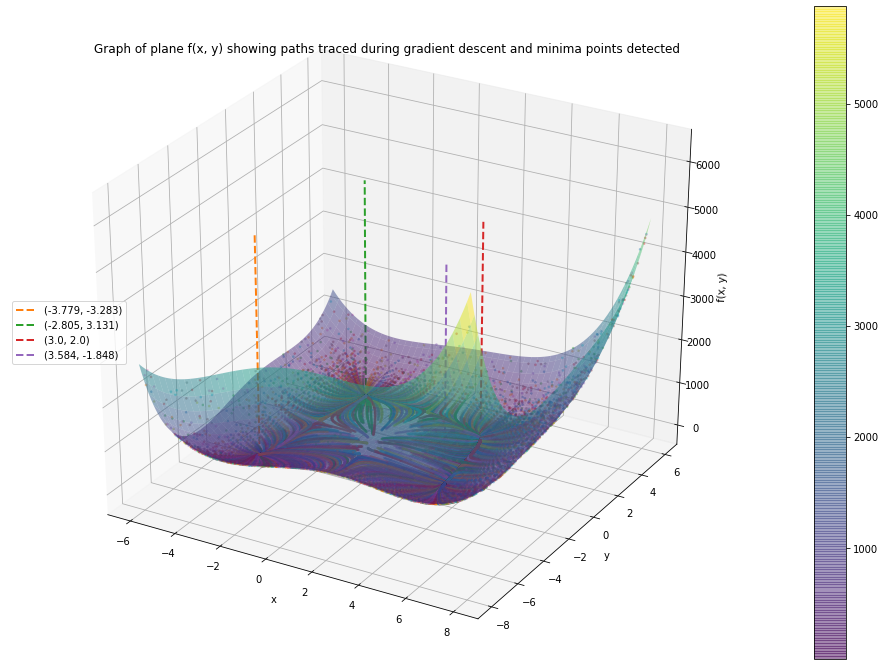

In [15]:
xmain = []
ymain = []
zmain = []
minima = []
crit_pts = []
plt.figure(figsize=(17,12))
ax = plt.axes(projection='3d')
x_pln = np.linspace(-6,8,100)
y_pln = np.linspace(-8,6,100)

# plot the plane using a meshgrid of values in x and y
x3d, y3d = np.meshgrid(x_pln, y_pln)
z3d = func(x3d, y3d)
pln = ax.plot_surface(x3d,y3d,z3d, alpha=0.5, cmap='viridis')

for i in range(2000):
    xval = []
    yval = []
    zval = []
    x = random.uniform(-6,8)
    y = random.uniform(-8,6)
    xval.append(x)
    yval.append(y)
    alpha = 0.001
    low = func(x, y)
    zval.append(low)
    while alpha:
        x_next = x - alpha*delx(x, y)
        y_next = y - alpha*dely(x, y)
        next_val = func(x_next, y_next)
        if next_val<low:
            xval.append(x_next)
            yval.append(y_next)
            zval.append(next_val)
            low = next_val
            x = x_next
            y = y_next
            continue
        else:
            break
    
    xmain.append(xval)
    ymain.append(yval)
    zmain.append(zval)
    ax.scatter(xval, yval, zval, s=3, alpha=0.3, zorder=zval)
    
    minima.append(round(low,5))
    crit_pts.append((round(x,3),round(y,3)))


d = {'(x, y)':crit_pts, 'min val':minima}
df = pd.DataFrame(data=d)

hist_df = df.groupby(['(x, y)'])['(x, y)'].count()

# marks the minima points with vertical lines
for pts in list(hist_df.index):
    a, b = zip(pts)
    aplt = [a[0]]*5000
    bplt = [b[0]]*5000
    cplt = range(5000)
    ax.plot3D(aplt, bplt, cplt, linestyle='dashed', linewidth=2.0, label=pts)
    ax.legend(loc=6)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

plt.colorbar(pln)
plt.title('Graph of plane f(x, y) showing paths traced during gradient descent and minima points detected')
plt.show()


The above is a 3D plot of the plane with the adjacent color map showing the values in respective regions. The multiple scatter plots on the plane are the trajectories of each gradient descent. A step size of 0.001 was chosen for this function so as to not overshoot the minima. The 4 vertical lines show the minima points as identified by the algorithm. We also see most of the gradient descent trajectories end up at one of the 4 points.

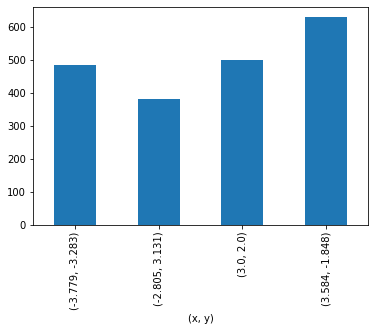

In [16]:
d = {'(x, y)':crit_pts, 'min val':minima}
df = pd.DataFrame(data=d)

hist_df = df.groupby(['(x, y)'])['(x, y)'].count()
min_df = df.groupby(['(x, y)'])['min val'].mean()
hist_df.plot(kind='bar', x='(x, y)')

Above is the histogram of the minima points as identified by the algorithm. The gradient descent algorithm stopped at a point only if the next point gave a higher function output than the previous output. The coordinates of that point have been rounded off till 3 decimal places. The values of the histogram bars refer to the counts of the number of times a gradient descent path ended at a point (x, y).

In [17]:
minima_df = pd.DataFrame({'f(x, y)': min_df, 'count': hist_df})
minima_df

,"f(x, y)",count
"(x, y)",,
"(-3.779, -3.283)",0.0,485
"(-2.805, 3.131)",0.0,383
"(3.0, 2.0)",0.0,502
"(3.584, -1.848)",0.0,630


The above is a dataframe representation of the minima points and the values of f(x, y) at those points.

# **Question 3**

All the four differential equaltions' field direction have been plotted below and we compare it to the graph in the question. We know that the equation should have critical points at Y=3 and Y=-1.

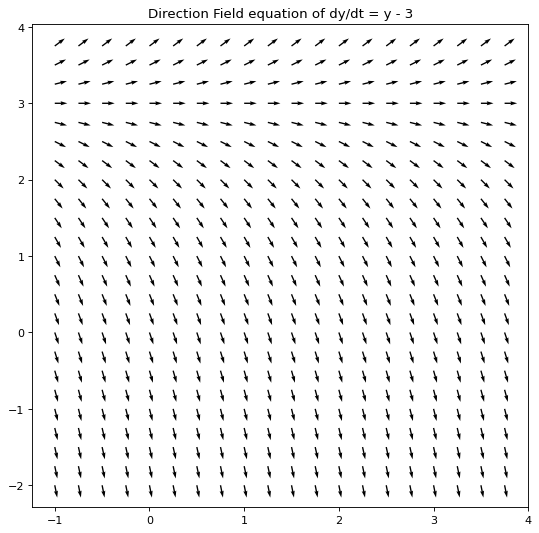

In [18]:
figure(figsize=(8, 8), dpi=80)
ticks = [-1,0,1,2,3,4]
X, Y = np.meshgrid(np.arange(-1, 4, .25), np.arange(-2, 4, .25))
U = np.ones_like(X) #dxdt = 1
V = (Y - 3)
magnitude = np.sqrt(U**2 + V**2)
U = U/magnitude
V = V/magnitude
plt.quiver(X, Y, U, V)
plt.title("Direction Field equation of dy/dt = y - 3")
plt.xticks(ticks)
plt.show()

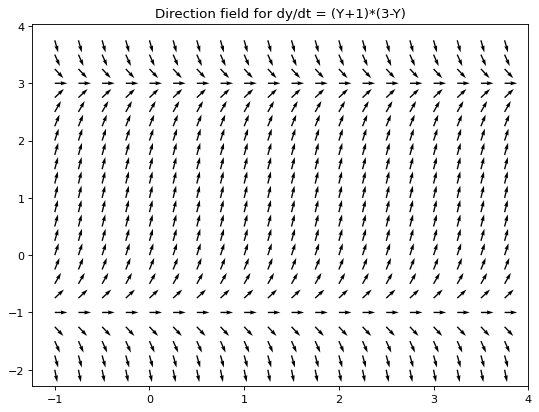

In [19]:
figure(figsize=(8, 6), dpi=80)
ticks = [-1,0,1,2,3,4]
X, Y = np.meshgrid(np.arange(-1, 4, .25), np.arange(-2, 4, .25))
U = np.ones_like(X) #dxdt = 1
V = (Y+1)*(3-Y)
magnitude = np.sqrt(U**2 + V**2)
U = U/magnitude
V = V/magnitude
plt.quiver(X, Y, U, V)

plt.xticks(ticks)
plt.title("Direction field for dy/dt = (Y+1)*(3-Y)")
plt.show()

The above plot looks similar to the plot given in the question. It shows stability in points Y=3 and Y=-1. But it shows positive tangent to dY/dt at Y=0 whereas in the question it has a negative tangent.

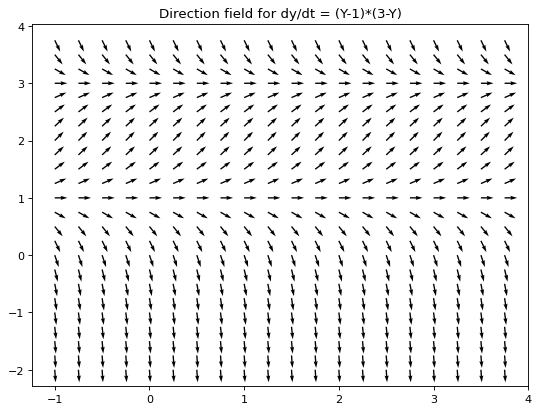

In [20]:
figure(figsize=(8, 6), dpi=80)
ticks = [-1,0,1,2,3,4]
X, Y = np.meshgrid(np.arange(-1, 4, .25), np.arange(-2, 4, .25))
U = np.ones_like(X) #dxdt = 1
V = (Y-1)*(3-Y)
magnitude = np.sqrt(U**2 + V**2)
U = U/magnitude
V = V/magnitude
third = plt.quiver(X, Y, U, V)
plt.xticks(ticks)
plt.title("Direction field for dy/dt = (Y-1)*(3-Y)")
plt.show()

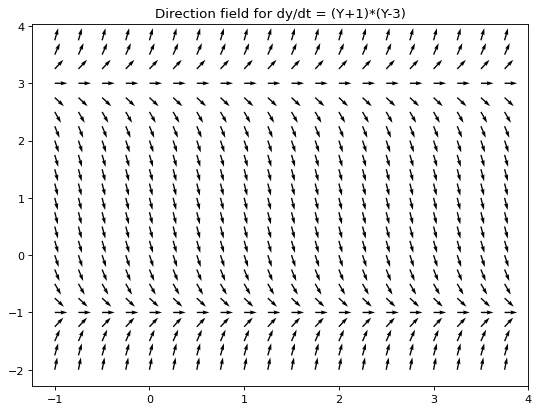

In [21]:
figure(figsize=(8, 6), dpi=80)
ticks = [-1,0,1,2,3,4]
X, Y = np.meshgrid(np.arange(-1, 4, .25), np.arange(-2, 4, .25))
U = np.ones_like(X) #dxdt = 1
V = (Y+1)*(Y-3)
magnitude = np.sqrt(U**2 + V**2)
U = U/magnitude
V = V/magnitude
fourth = plt.quiver(X, Y, U, V)
plt.xticks(ticks)
plt.title("Direction field for dy/dt = (Y+1)*(Y-3)")
plt.show()

The above graph matches that in the question and satisfies both the critical points in that it is stable at Y = 3 and -1 and the tangent of dY/dt at Y=0 is in a negative direction.

# **Question 4**

Below are the field direction plot and phase plot of the dynamical system

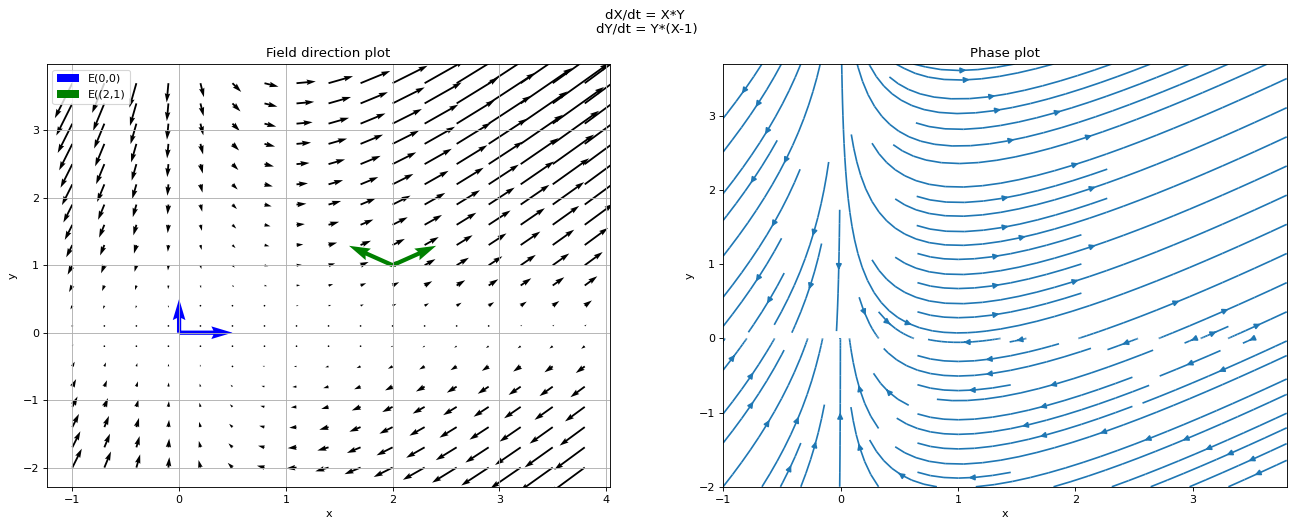

In [25]:
figure(figsize=(20, 7), dpi=80)
X, Y = np.meshgrid(np.arange(-1, 4, .3), np.arange(-2, 4, .3))
U = X*Y
V = Y*(X-1)

# plot field direction
plt.subplot(1,2,1)
plt.xlabel('x')
plt.ylabel('y')
plt.quiver(X, Y, U, V)
plt.title('Field direction plot')

# plot eigenvector at (0,0)
A = np.array([[0,0],[0,-1]])
eigenvalues2, eigenvectors2 =  LA.eig(A)
x_comp2 = eigenvectors2[0, :]
y_comp2 = eigenvectors2[1, :]
origins = [0 for i in range(len(x_comp2))]
plt.quiver(origins, origins, x_comp2, y_comp2, angles='xy', color='blue', scale_units='xy', scale=2, label='E(0,0)')

# plot eigenvector at (2,1)
B = np.array([[1,2],[1,1]])
eigenvalues, eigenvectors =  LA.eig(B)
x_comp = eigenvectors[0, :]
y_comp = eigenvectors[1, :]
xes = [2 for i in range(len(x_comp))]
yes = [1 for i in range(len(x_comp))]
plt.quiver(xes, yes, x_comp, y_comp, angles='xy', color='green', scale_units='xy', scale=2, label='E((2,1)')
plt.grid(True)
plt.legend(loc=2)


plt.subplot(1,2,2)
plt.xlabel('x')
plt.ylabel('y')
plt.streamplot(X, Y, U, V)
plt.title('Phase plot')

plt.suptitle("dX/dt = X*Y \ndY/dt = Y*(X-1)")


plt.show()

The thick fat lines in the field direction plot represent the eigenvectors of the system at the equilibrium points (0,0) and (2,1). The eigenvectors and their associated eigenvalues scale and give shape to the field direction vectors. We can see the eigenvectors at (0,0) are orthogonal. The eigenvector at y=0 has eigenvalue 0 and hence everything on the line is 0. The eigenvector given by x=0 has eigenvalue -1 therefore it mirrors the arrows on the line about the origin and shrinks them. Similarly the point (2,1) has 2 eigenvectors. The one pointing to the right has a eigenvalue 1+sqrt(2) and it expands the arrows in that direction by the same factor and the other one pointing left has eigenvalue 1-sqrt(2) and so it shrinks the arrows. The eigenvectors at both the points affect the shape of the direction field and the eigenvalues affect the size of the direction vector.